## 作業
當銀行收到貸款申請時，必須根據客戶的個人檔案決定是否應該要核准貸款

如果客戶信用良好，批准貸款 如果客戶信用較差，不批准貸款 透過分析目的，可將低銀行風險、提升潛在獲利

現有一資料集 Creditability (https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv)

包含客戶特徵

- Account Balance(帳戶餘額): 沒有帳號(1), 沒有餘額 (2), 部分存款 (3)
- Payment Status(付款狀況): 有問題 (1), 付清 (2), 於該銀行沒有問題(3)
- Savings/Stock Value (存款): 沒有, 少於 100, 100 ~ 1,000, 高於1,000
- Employment Length(工作長短): 少於 1 年, 1 ~ 4年, 4 ~ 7年, 高於 7 年
- Sex/Marital Status(性別與婚姻): 男生/女生, 單身/離婚/已婚/鰥夫
- No of Credits at this bank(貸款數): 1, >1
- Guarantor(保人): None, Yes
- Concurrent Credits(其他貸款數): 其他銀行或百貨, None
- ForeignWorker (外國工作者)
- Purpose of Credit(貸款目的): New car, Used car, Home Related, Other
預測目標

- Creditability (可信客戶): 1/0


請用Python 回答以下問題：

- 使用Pandas 將資料讀取到一名為 df 的 DataFrame 中
- 請使用Pandas 統計男女別的平均 Credit.Amount
- 請使用邏輯式迴歸建立模型 (目標 y 為 Creditability)
- 請計算出模型準確度(Accuracy)?

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv', index_col = 0)

In [4]:
df.head()

,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [5]:
# SELECT sex, AVG(credit.amount) FROM df GROUP BY sex;
df.groupby('Sex...Marital.Status')['Credit.Amount'].mean()

Sex...Marital.Status
1    2896.327684
2    3694.981685
3    1993.360000
Name: Credit.Amount, dtype: float64

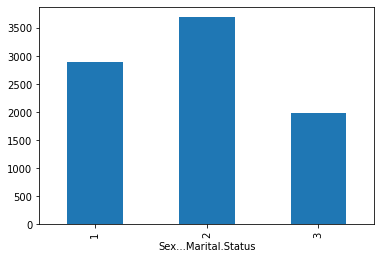

In [6]:
df.groupby('Sex...Marital.Status')['Credit.Amount'].mean().plot(kind = 'bar')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 497 to 385
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      500 non-null    int64
 1   Account.Balance                    500 non-null    int64
 2   Duration.of.Credit..month.         500 non-null    int64
 3   Payment.Status.of.Previous.Credit  500 non-null    int64
 4   Purpose                            500 non-null    int64
 5   Credit.Amount                      500 non-null    int64
 6   Value.Savings.Stocks               500 non-null    int64
 7   Length.of.current.employment       500 non-null    int64
 8   Instalment.per.cent                500 non-null    int64
 9   Sex...Marital.Status               500 non-null    int64
 10  Guarantors                         500 non-null    int64
 11  Duration.in.Current.address        500 non-null    int64
 12  Most.valuable.availa

In [9]:
df.isna().sum()

Creditability                        0
Account.Balance                      0
Duration.of.Credit..month.           0
Payment.Status.of.Previous.Credit    0
Purpose                              0
Credit.Amount                        0
Value.Savings.Stocks                 0
Length.of.current.employment         0
Instalment.per.cent                  0
Sex...Marital.Status                 0
Guarantors                           0
Duration.in.Current.address          0
Most.valuable.available.asset        0
Age..years.                          0
Concurrent.Credits                   0
Type.of.apartment                    0
No.of.Credits.at.this.Bank           0
Occupation                           0
No.of.dependents                     0
Telephone                            0
Foreign.Worker                       0
dtype: int64

In [11]:
df.select_dtypes('object')

""
497
756
580
833
602
...
269
425
43
516


In [0]:
Y = df.iloc[:,0]
X = df.iloc[:,1:]

In [13]:
X.shape

(500, 20)

In [14]:
Y.shape

(500,)

In [15]:
df.shape

(500, 21)

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [17]:
clf.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted = clf.predict(X)

In [22]:
(predicted == Y).sum() / len(Y)

0.798

## 類神經網路

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

In [24]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [27]:
digits.images.shape

(1797, 8, 8)

In [25]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

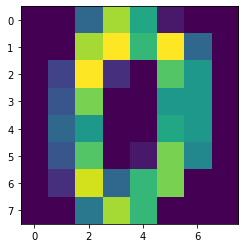

In [28]:
from matplotlib import pyplot as plt
plt.imshow(digits.images[0])

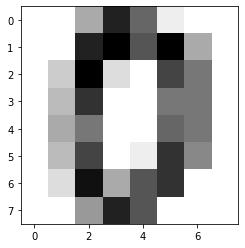

In [30]:
from matplotlib import pyplot as plt
plt.imshow(digits.images[0],cmap=plt.cm.binary)

In [32]:
digits.target[0]

0

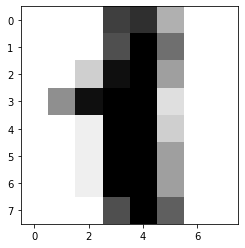

In [33]:
from matplotlib import pyplot as plt
plt.imshow(digits.images[1],cmap=plt.cm.binary)

In [34]:
digits.target[1]

1

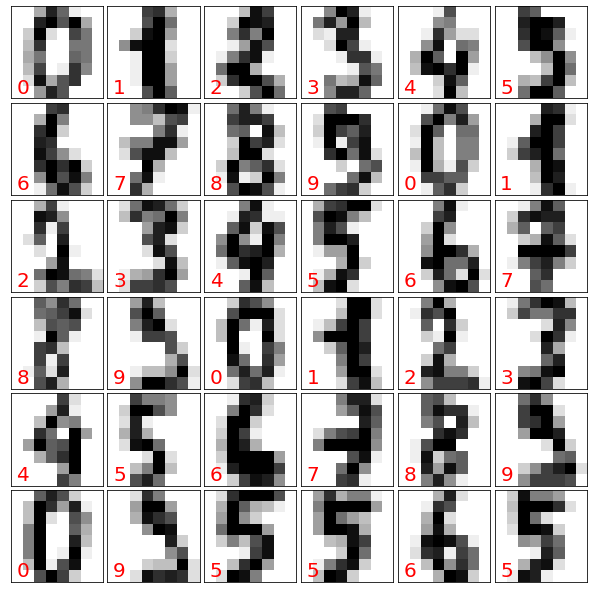

In [35]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
  ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
  ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
  ax.text(0, 7, str(digits.target[i]), color="red", fontsize = 20)

In [0]:
# standard scalar
# x - mu / std

In [38]:
from sklearn.preprocessing import StandardScaler
import numpy as np
a = np.array([[50], [60], [70]])
sc = StandardScaler()
sc.fit_transform(a)

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [39]:
a.mean()

60.0

In [41]:
(a - a.mean()) / a.std()

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [43]:
a = np.array([[50], [60], [70]])
sc = StandardScaler()
sc.fit_transform(a)

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [45]:
a2 = np.array([[1000000], [0], [2000000]])
sc = StandardScaler()
sc.fit_transform(a2)

array([[ 0.        ],
       [-1.22474487],
       [ 1.22474487]])

In [47]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [49]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [50]:
digits.data.shape

(1797, 64)

In [51]:
digits.target.shape

(1797,)

In [0]:
sc = StandardScaler()
X_scaled = sc.fit_transform(digits.data)

In [115]:
from sklearn.neural_network import MLPClassifier
# X:64 => H1:30 => H2:30 => H3:30 => Y:10
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='relu', max_iter = 1000)
mlp.fit(X_scaled, digits.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

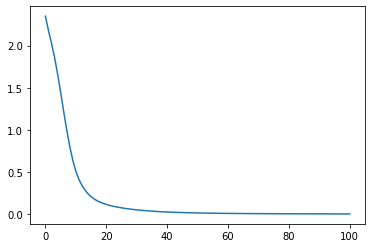

In [116]:
plt.plot(range(len(mlp.loss_curve_)), mlp.loss_curve_)

In [0]:
predicted = mlp.predict(X_scaled)

In [118]:
(predicted  == digits.target).sum() / len(digits.target)

1.0

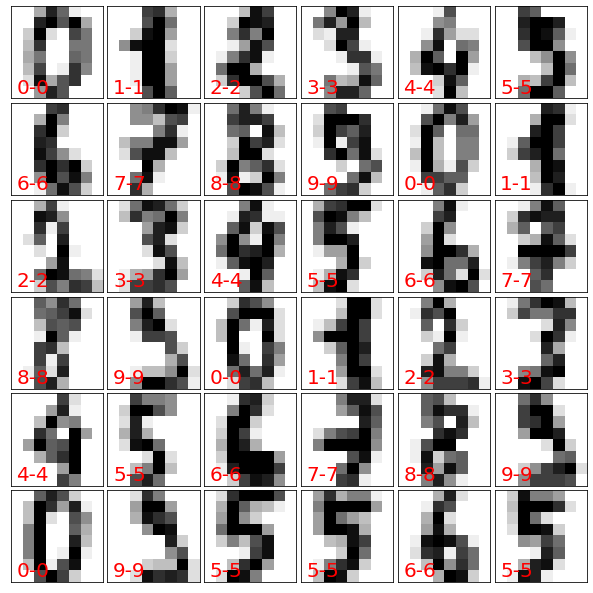

In [119]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
  ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
  ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
  ax.text(0, 7, str('{}-{}'.format(digits.target[i],predicted[i])), color="red", fontsize = 20)

In [120]:
mlp.coefs_[0].shape

(64, 30)

In [121]:
mlp.coefs_[1].shape

(30, 30)

In [122]:
mlp.coefs_[2].shape

(30, 30)

In [123]:
mlp.coefs_[3].shape

(30, 10)

In [124]:
! wget https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/4.jpg

--2020-05-30 03:10:08--  https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/4.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695 [image/jpeg]
Saving to: ‘4.jpg.1’

4.jpg.1             100%[===================>]     695  --.-KB/s    in 0s      

2020-05-30 03:10:08 (33.8 MB/s) - ‘4.jpg.1’ saved [695/695]



In [125]:
from PIL import Image
img = Image.open('4.jpg').convert('L')
img

In [0]:
import numpy as np
im = np.array(img)

In [127]:
im.shape

(8, 8)

In [0]:
im2 = ((255 - im) / 256 * 16).astype(int)

In [0]:
im2 = im2.reshape((1,64))

In [0]:
im2_scaled = sc.transform(im2)

In [131]:
mlp.predict(im2_scaled)

array([4])

## 模型評估

In [133]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
clf = LogisticRegression(max_iter=300)
clf.fit(iris.data, iris.target)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted = clf.predict(iris.data)


In [135]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [137]:
(predicted == iris.target).sum() / len(iris.target)

0.9733333333333334

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, predicted)

0.9733333333333334

In [0]:
# 700 100
# 100 100

In [0]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(iris.target, predicted)


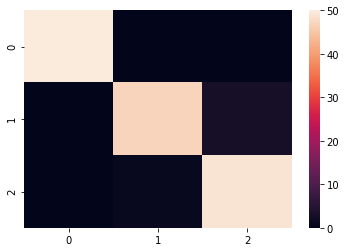

In [144]:
import seaborn
seaborn.heatmap(m)

In [145]:
from sklearn.metrics import classification_report
print(classification_report(iris.target, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



## 建立訓練與測試資料集

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data
y = iris.target


In [147]:
X.shape

(150, 4)

In [149]:
y.shape

(150,)

In [0]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [152]:
train_X.shape

(100, 4)

In [153]:
test_X.shape

(50, 4)

In [154]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predicted = clf.predict(test_X)

In [158]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)

1.0

In [160]:
confusion_matrix(test_y, predicted)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

In [161]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
for train, test in kf.split(X):
  train_X, test_X, train_y, test_y = X[train],X[test], y[train], y[test]
  clf = DecisionTreeClassifier()
  clf.fit(train_X, train_y)
  predicted = clf.predict(test_X)
  print(accuracy_score(test_y, predicted))

1.0
1.0
1.0
0.9333333333333333
0.9333333333333333
0.8666666666666667
1.0
0.8666666666666667
0.7333333333333333
1.0


In [162]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf, X=iris.data, y= iris.target, cv= 10)
acc

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [165]:
from sklearn.model_selection import LeaveOneOut
res = []
loo = LeaveOneOut()
for train, test in loo.split(X):
  train_X, test_X, train_y, test_y = X[train],X[test], y[train], y[test]
  clf = DecisionTreeClassifier()
  clf.fit(train_X, train_y)
  predicted = clf.predict(test_X)
  res.extend((predicted == test_y).tolist())
sum(res) / 150

0.96

In [171]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data[50:,:]
Y = iris.target[50:]
clf = LogisticRegression(max_iter=300)
clf.fit(X, Y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
predicted = clf.predict(X)
confusion_matrix(Y, predicted)

array([[47,  3],
       [ 1, 49]])

In [186]:
predicted = [1 if e else 2 for e in clf.predict_proba(X)[:,0] > 0.5]
confusion_matrix(Y, predicted)

array([[47,  3],
       [ 1, 49]])

In [188]:
predicted = [1 if e else 2 for e in clf.predict_proba(X)[:,0] > 0.4]
confusion_matrix(Y, predicted)

array([[49,  1],
       [ 6, 44]])

In [189]:
predicted = [1 if e else 2 for e in clf.predict_proba(X)[:,0] > 0.3]
confusion_matrix(Y, predicted)

array([[50,  0],
       [ 7, 43]])

In [191]:
predicted = [1 if e else 2 for e in clf.predict_proba(X)[:,0] > 0.5]
m = confusion_matrix(Y, predicted)
m

array([[47,  3],
       [ 1, 49]])

In [0]:
TP = m[0,0]
FP = m[0,1]
FN = m[1,0]
TN = m[1,1]
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)

In [199]:
import numpy as np
import pandas
FPR_ary = [0]
TPR_ary = [0]
for threshold in np.arange(0,1,0.1):
  #print(threshold)
  predicted = [1 if e else 2 for e in clf.predict_proba(X)[:,0] > threshold]
  m = confusion_matrix(Y, predicted)
  TP = m[0,0]
  FP = m[0,1]
  FN = m[1,0]
  TN = m[1,1]
  FPR = FP / (FP + TN)
  TPR = TP / (TP + FN)
  if pandas.notnull(FPR) and pandas.notnull(TPR):
    #print(FPR, TPR)
    FPR_ary.append(FPR)
    TPR_ary.append(TPR)
FPR_ary.append(1)
TPR_ary.append(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


In [201]:
FPR_ary

[0,
 0.0,
 0.0,
 0.0,
 0.022222222222222223,
 0.057692307692307696,
 0.07407407407407407,
 0.09090909090909091,
 0.20634920634920634,
 0.3150684931506849,
 1]

In [203]:
TPR_ary

[0,
 0.684931506849315,
 0.819672131147541,
 0.8771929824561403,
 0.8909090909090909,
 0.9791666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 1]

Text(0.5, 1.0, 'ROC Curve')

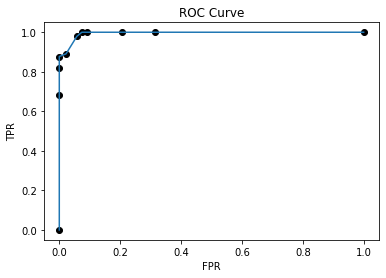

In [208]:
plt.scatter(FPR_ary, TPR_ary, c = 'black')
plt.plot(FPR_ary, TPR_ary)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

In [209]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data[50:,:]
Y = iris.target[50:]
clf = LogisticRegression(max_iter=300)
clf.fit(X, Y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y- 1,clf.predict_proba(X)[:,1])

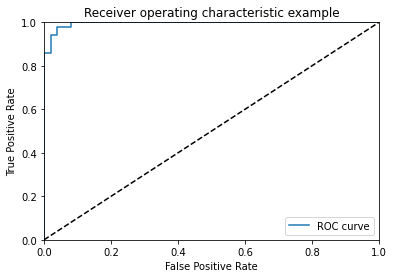

In [214]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [216]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.995200


## 使用 ROC Curve 與 AUC 比較不同模型

In [218]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
iris = load_iris()
X = iris.data[50:150,]

le = preprocessing.LabelEncoder()
y = le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [220]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =0.33, random_state = 123)
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [222]:
clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [223]:
clf2 = SVC(probability=True)
clf2.fit(train_X, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [224]:
clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [225]:
clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [229]:
clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

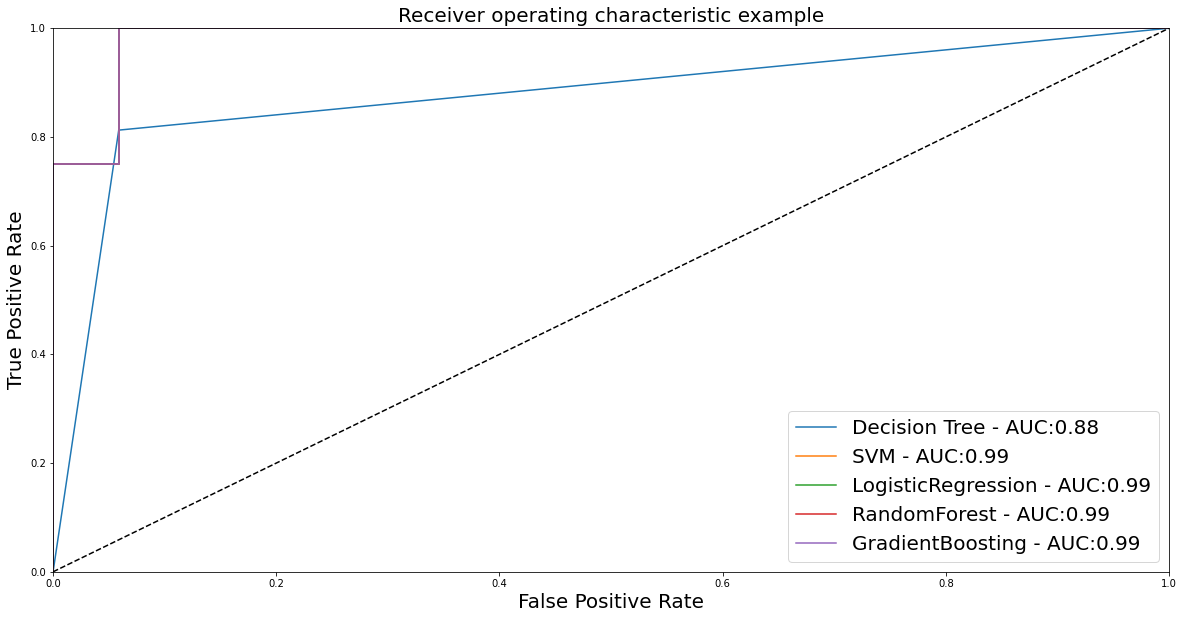

In [233]:
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4, clf5], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest', 'GradientBoosting']):
  probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
  fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
  plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## 顧客流失預測模型

### 讀取資料

In [0]:
import pandas
customers = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customer_churn.csv', index_col = 0 )

In [238]:
customers.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no


In [240]:
customers.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [242]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

### 資料預處理

In [0]:
customers = customers.iloc[:,3:]

In [245]:
customers.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [247]:
customers.select_dtypes('object').head(3)

,international_plan,voice_mail_plan,churn
1,no,yes,no
2,no,yes,no
3,no,no,no


In [0]:
customers['international_plan'] = customers['international_plan'].replace({'yes':1, 'no': 0 })
customers['voice_mail_plan'] = customers['voice_mail_plan'].replace({'yes':1, 'no': 0 })
customers['churn'] = customers['churn'].replace({'yes':1, 'no': 0 })

In [249]:
customers.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 將資料分為訓練與測試資料集

In [0]:
Y = customers.iloc[:,-1]
X = customers.iloc[:,:-1]

In [0]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = 0.3 , random_state = 42)

### 建立模型

In [258]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 10000)
clf.fit(train_X, train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted = clf.predict(test_X)

In [261]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_Y, predicted)

0.864

In [263]:
confusion_matrix(test_Y, predicted)

array([[833,  24],
       [112,  31]])

In [264]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predicted = clf.predict(test_X)

In [266]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_Y, predicted)

0.915

In [267]:
confusion_matrix(test_Y, predicted)

array([[812,  45],
       [ 40, 103]])

### 模型比較

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [270]:
clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_Y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_Y)

clf3 =LogisticRegression()
clf3.fit(train_X, train_Y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_Y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


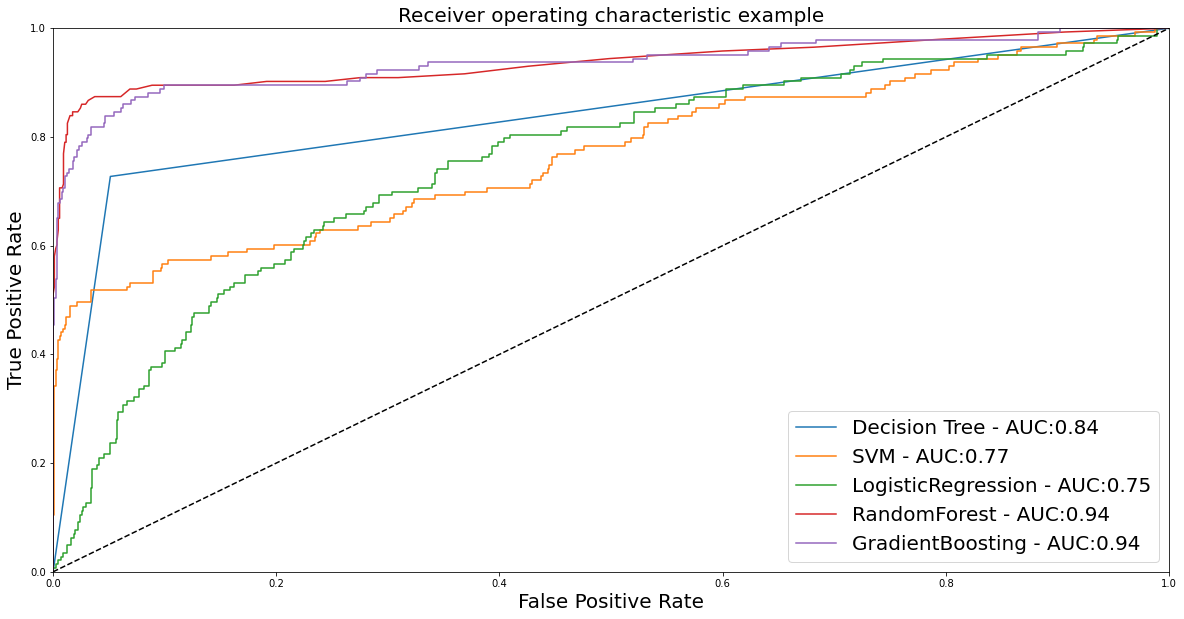

In [272]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4, clf5], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest', 'GradientBoosting']):
  probas_ = clf.fit(train_X, train_Y).predict_proba(test_X)
  fpr, tpr, thresholds = roc_curve(test_Y, probas_[:, 1])
  plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

In [0]:
predicted = clf4.predict(test_X)

In [274]:
confusion_matrix(test_Y, predicted)

array([[852,   5],
       [ 42, 101]])

In [306]:
42 / 142

0.29577464788732394

## 類別不平均

In [277]:
customers['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [0]:
customers0 = customers[customers['churn'] == 0].iloc[0:400, :]
customers1 = customers[customers['churn'] == 1].iloc[0:400, :]

In [0]:
customers2 = pandas.concat([customers0, customers1])

In [282]:
len(customers2)

800

In [0]:
from sklearn.utils import shuffle
customers2 = shuffle(customers2)


In [0]:
#customers2['churn']

In [0]:
Y = customers2.iloc[:,-1]
X = customers2.iloc[:,:-1]

In [0]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = 0.3 , random_state = 42)

In [293]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 10000)
clf.fit(train_X, train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted = clf.predict(test_X)

In [295]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_Y, predicted)

0.7

In [296]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predicted = clf.predict(test_X)

In [298]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_Y, predicted)

0.7375

In [300]:
confusion_matrix(test_Y, predicted)

array([[81, 29],
       [34, 96]])

In [301]:
clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_Y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_Y)

clf3 =LogisticRegression()
clf3.fit(train_X, train_Y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_Y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


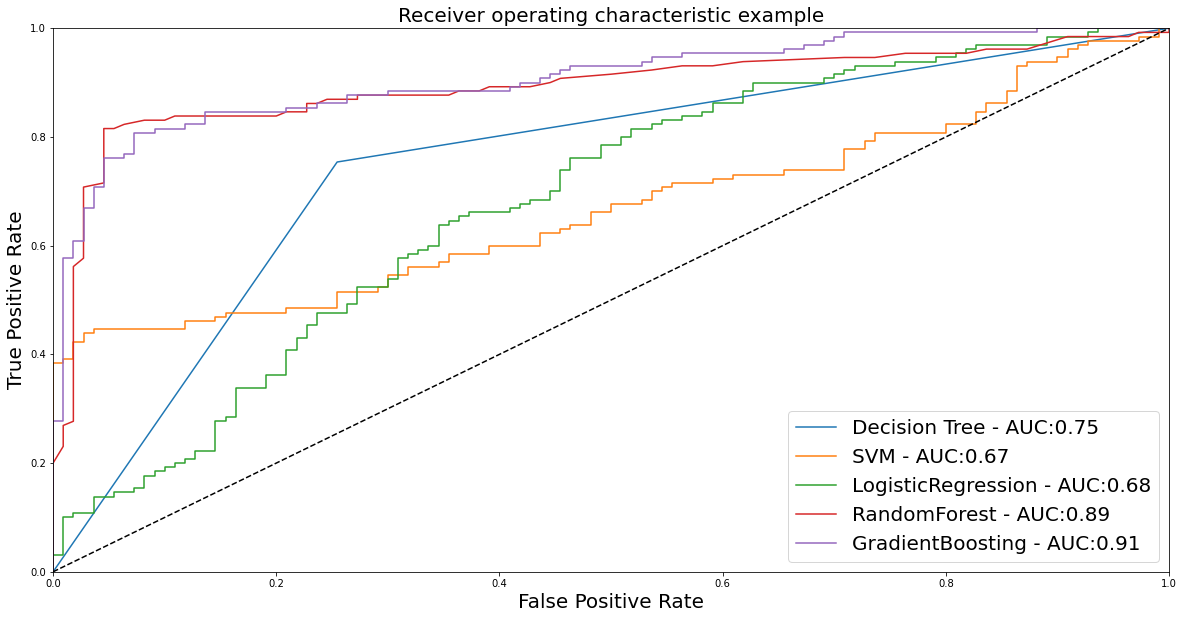

In [302]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4, clf5], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest', 'GradientBoosting']):
  probas_ = clf.fit(train_X, train_Y).predict_proba(test_X)
  fpr, tpr, thresholds = roc_curve(test_Y, probas_[:, 1])
  plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

In [0]:
predicted = clf5.predict(test_X)

In [304]:
accuracy_score(test_Y, predicted)

0.85

In [305]:
confusion_matrix(test_Y, predicted)

array([[ 95,  15],
       [ 21, 109]])

In [307]:
21 / 130

0.16153846153846155